In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy.stats import wasserstein_distance, norm

In [2]:
from plotnine import *

In [3]:
import pandas as pd

In [4]:
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 16,8

In [5]:
size = 1000

In [6]:
test_means = np.linspace(0.2,0.8,5)

test_sds = [np.random.uniform(0,0.3) for _ in test_means]

means_comb = []
sds_comb = []
for mean_comb, sd_comb in zip(itertools.permutations(test_means, 2),itertools.permutations(test_sds,2)):
    means_comb.append(mean_comb)
    sds_comb.append(sd_comb)

In [7]:
test_dists = []
for i in range(len(means_comb)):
    test_dists.append([
        norm.rvs(size = size,loc = means_comb[i][0],scale = sds_comb[i][0]),
        norm.rvs(size = size,loc = means_comb[i][1],scale = sds_comb[i][1])
    ])

In [8]:
def plot(df_plot, distance):
    
    fig = (
        ggplot(data = df_plot, mapping = aes(x = 'probability')) + 
        geom_density(aes(color = 'label')) +
        annotate('text', x = 0.2, y = 4, label = str(distance))
    ).draw(show = False, return_ggplot = False);
    
    return fig

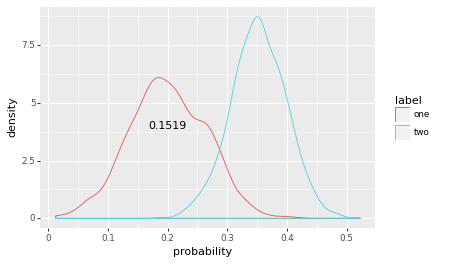

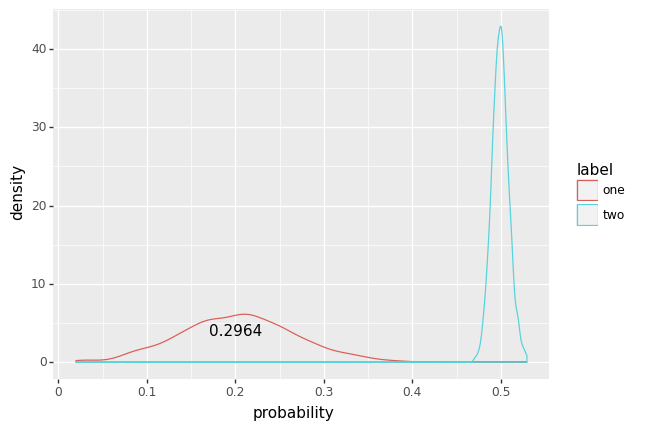

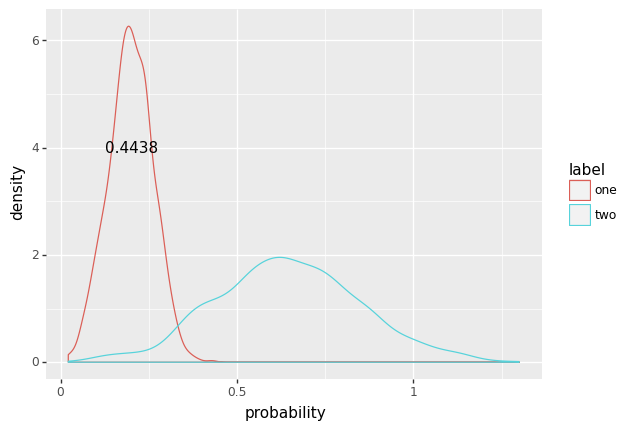

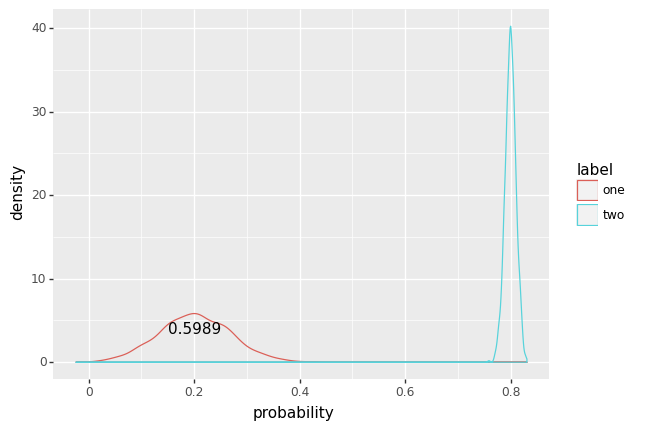

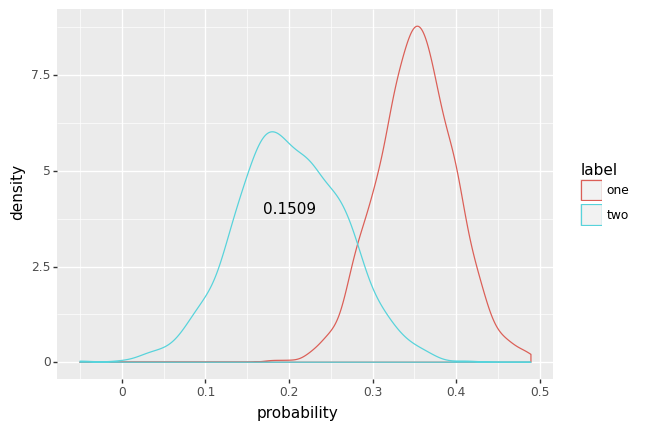

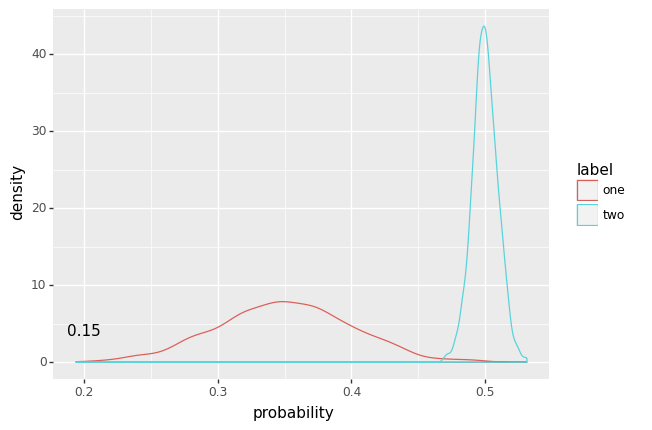

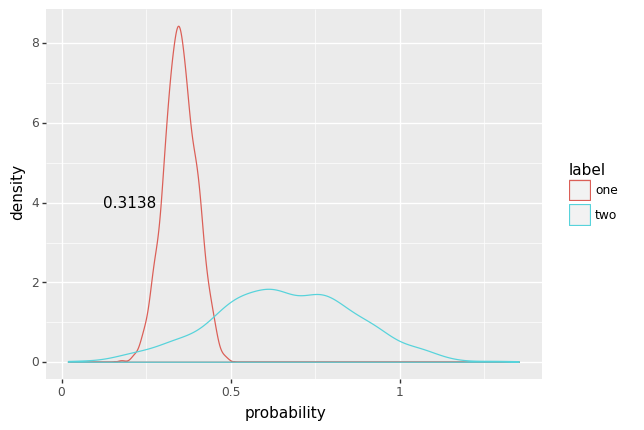

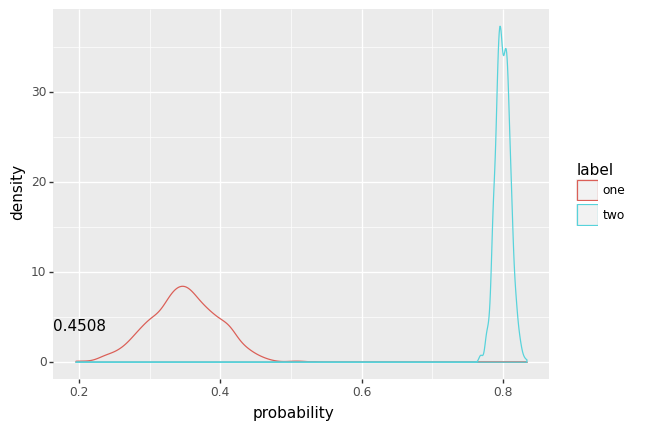

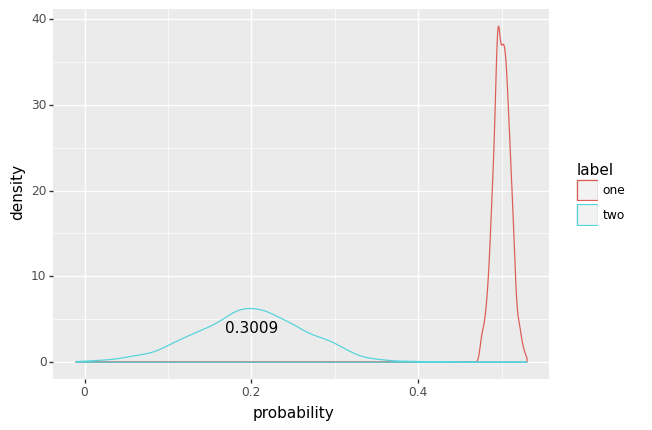

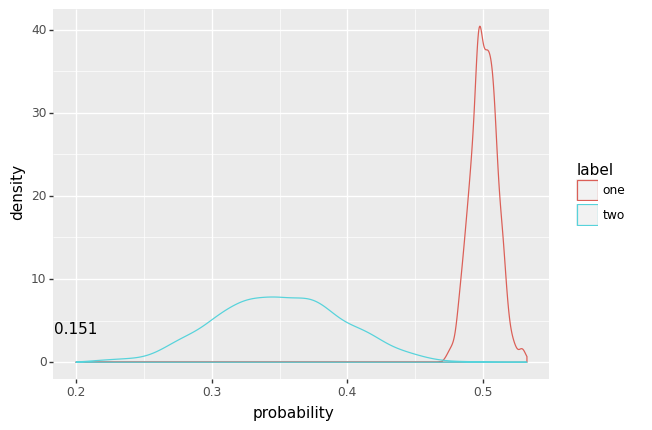

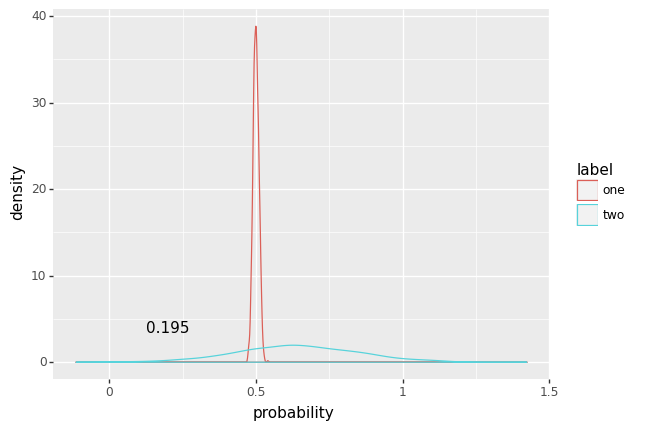

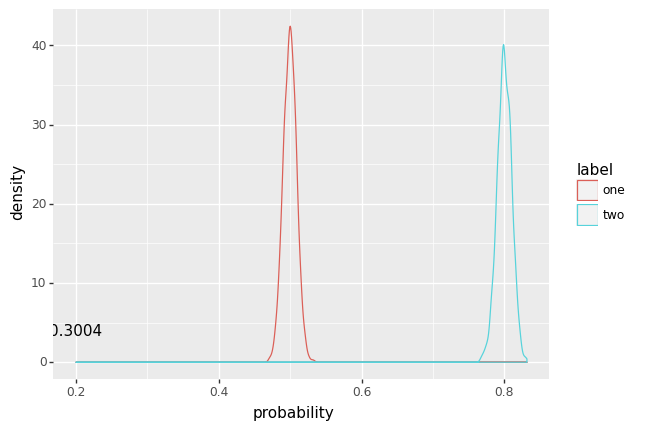

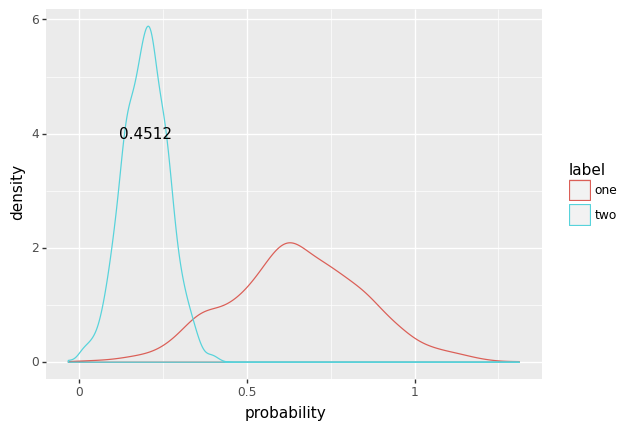

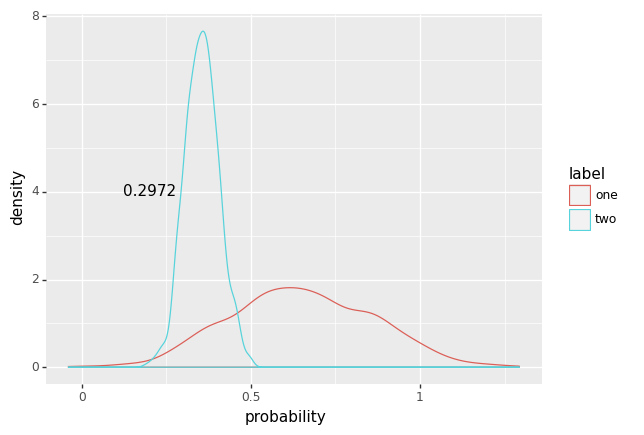

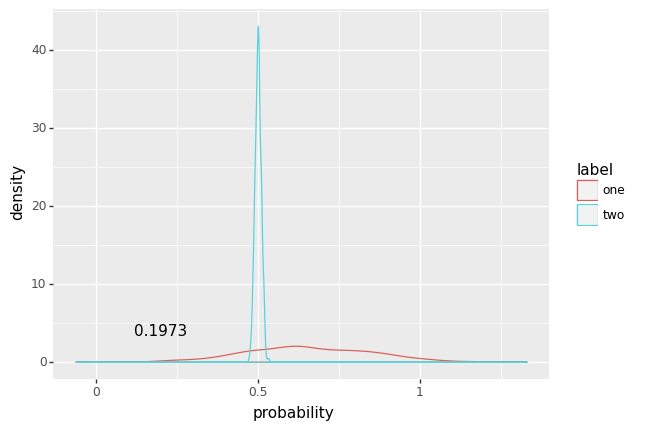

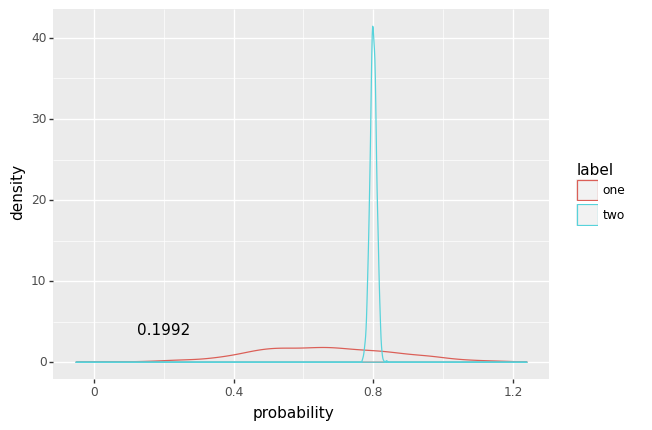

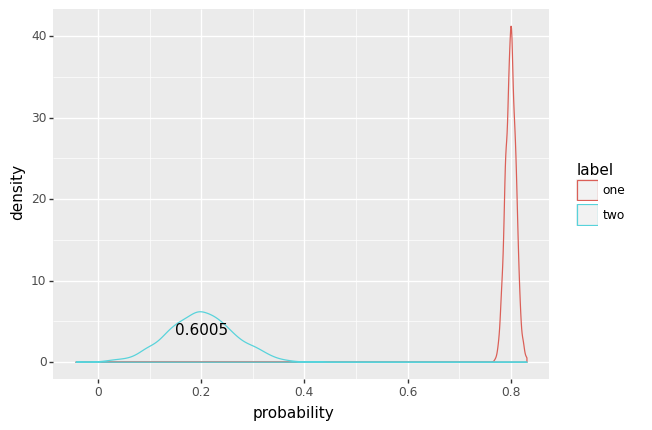

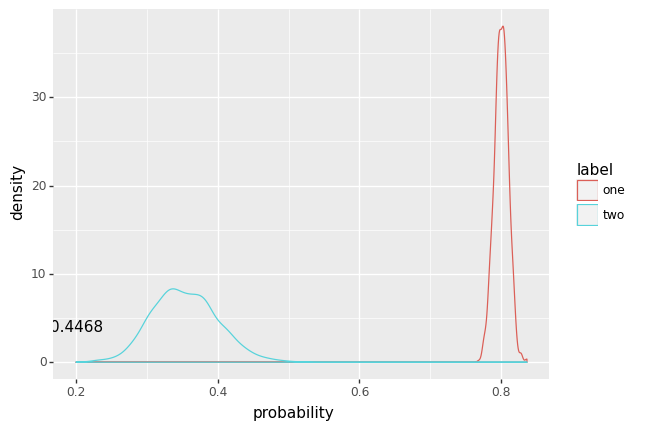

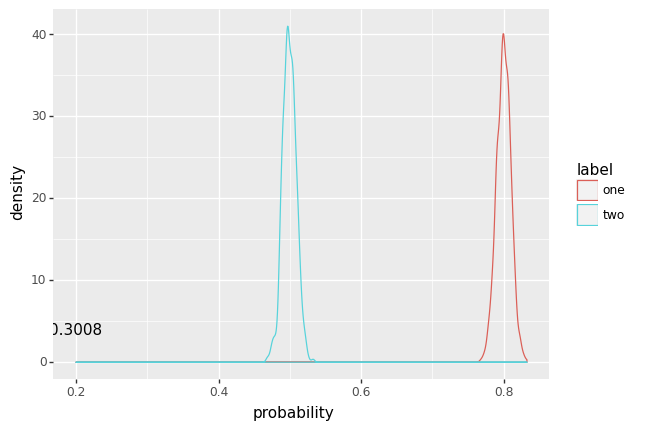

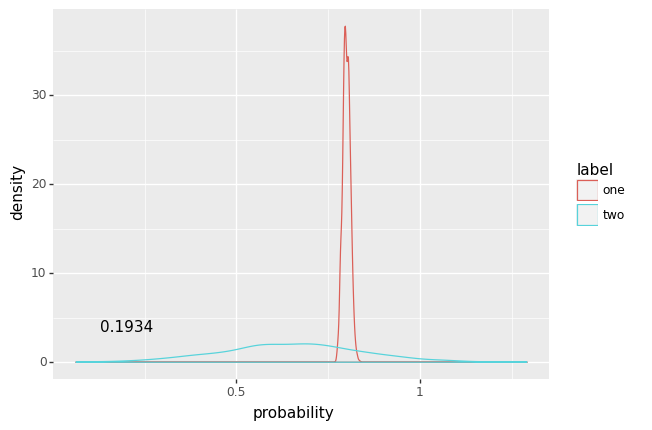

In [9]:
for i in range(len(test_dists)):
    
    label_one = ['one']*size
    label_two = ['two']*size

    labels = label_one + label_two

    u_values = list(test_dists[i][0])
    v_values = list(test_dists[i][1])

    values = u_values + v_values
    
    distance = round(wasserstein_distance(u_values, v_values),4)

    df_plot = pd.DataFrame({'label':labels, 'probability':values})
    
    plot(df_plot, distance)

In [17]:
means = [1,1.5,1.8,10]

In [18]:
sds = [0.5,0.5,0.8,0.2]

In [19]:
dists = []
for i in range(len(means)):
    dists.append(norm.rvs(size = size,loc = means[i],scale = sds[i]))

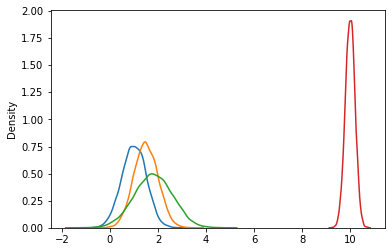

In [20]:
for dist in dists:
    sns.kdeplot(dist)

In [21]:
means_comb = []
sds_comb = []
for mean_comb, sd_comb in zip(itertools.permutations(means, 2),itertools.permutations(sds,2)):
    means_comb.append(mean_comb)
    sds_comb.append(sd_comb)

In [22]:
means_comb

[(1, 1.5),
 (1, 1.8),
 (1, 10),
 (1.5, 1),
 (1.5, 1.8),
 (1.5, 10),
 (1.8, 1),
 (1.8, 1.5),
 (1.8, 10),
 (10, 1),
 (10, 1.5),
 (10, 1.8)]

In [23]:
dists = []
for _means, _sds in zip(means_comb,sds_comb):
    dists.append([
        norm.rvs(size = size,loc = _means[0],scale = _sds[0]),
        norm.rvs(size = size,loc = _means[1],scale = _sds[1])
    ])

In [25]:
for i in range(len(dists)):
    print(means_comb[i])
    dist_one = dists[i][0]
    dist_two = dists[i][1]
#     sns.kdeplot(dist_one)
#     sns.kdeplot(dist_two)
#     plt.show()
    
    earth_moving_effort = wasserstein_distance(u_values = dist_one, v_values = dist_two)
    print(earth_moving_effort)

(1, 1.5)
0.5067177582347635
(1, 1.8)
0.800101688973941
(1, 10)
8.997377128016717
(1.5, 1)
0.4927394555515033
(1.5, 1.8)
0.3489697493860851
(1.5, 10)
8.508292971860888
(1.8, 1)
0.8050283007446837
(1.8, 1.5)
0.34691712535821473
(1.8, 10)
8.199876946517696
(10, 1)
9.00661008198238
(10, 1.5)
8.49218383763947
(10, 1.8)
8.196170542940745


In [92]:
u_weights = None
v_weights = None

In [72]:
p = 1

In [74]:
u_values = dists[0][0]

In [75]:
v_values = dists[0][1]

In [76]:
# def _cdf_distance(p, u_values, v_values, u_weights=None, v_weights=None):
r"""
Compute, between two one-dimensional distributions :math:`u` and
:math:`v`, whose respective CDFs are :math:`U` and :math:`V`, the
statistical distance that is defined as:
.. math::
    l_p(u, v) = \left( \int_{-\infty}^{+\infty} |U-V|^p \right)^{1/p}
p is a positive parameter; p = 1 gives the Wasserstein distance, p = 2
gives the energy distance.
Parameters
----------
u_values, v_values : array_like
    Values observed in the (empirical) distribution.
u_weights, v_weights : array_like, optional
    Weight for each value. If unspecified, each value is assigned the same
    weight.
    `u_weights` (resp. `v_weights`) must have the same length as
    `u_values` (resp. `v_values`). If the weight sum differs from 1, it
    must still be positive and finite so that the weights can be normalized
    to sum to 1.
Returns
-------
distance : float
    The computed distance between the distributions.
Notes
-----
The input distributions can be empirical, therefore coming from samples
whose values are effectively inputs of the function, or they can be seen as
generalized functions, in which case they are weighted sums of Dirac delta
functions located at the specified values.
References
----------
.. [1] Bellemare, Danihelka, Dabney, Mohamed, Lakshminarayanan, Hoyer,
       Munos "The Cramer Distance as a Solution to Biased Wasserstein
       Gradients" (2017). :arXiv:`1705.10743`.
"""
#     u_values, u_weights = _validate_distribution(u_values, u_weights)
#     v_values, v_weights = _validate_distribution(v_values, v_weights)

'\nCompute, between two one-dimensional distributions :math:`u` and\n:math:`v`, whose respective CDFs are :math:`U` and :math:`V`, the\nstatistical distance that is defined as:\n.. math::\n    l_p(u, v) = \\left( \\int_{-\\infty}^{+\\infty} |U-V|^p \\right)^{1/p}\np is a positive parameter; p = 1 gives the Wasserstein distance, p = 2\ngives the energy distance.\nParameters\n----------\nu_values, v_values : array_like\n    Values observed in the (empirical) distribution.\nu_weights, v_weights : array_like, optional\n    Weight for each value. If unspecified, each value is assigned the same\n    weight.\n    `u_weights` (resp. `v_weights`) must have the same length as\n    `u_values` (resp. `v_values`). If the weight sum differs from 1, it\n    must still be positive and finite so that the weights can be normalized\n    to sum to 1.\nReturns\n-------\ndistance : float\n    The computed distance between the distributions.\nNotes\n-----\nThe input distributions can be empirical, therefore 

In [77]:
u_sorter = np.argsort(u_values)
v_sorter = np.argsort(v_values)

print('argsort')
print(u_sorter)
print(v_sorter)

all_values = np.concatenate((u_values, v_values))
all_values.sort(kind='mergesort')

print('mergesort')
print(all_values)

# Compute the differences between pairs of successive values of u and v.
deltas = np.diff(all_values)
print('diferenca entre todos valores')
print(deltas)

argsort
[6554 9930 7944 ... 2706 2538 3165]
[9688 4066 2407 ... 5533 7357 1591]
mergesort
[-0.90392873 -0.7774293  -0.70614725 ...  3.10969016  3.12935534
  3.1646002 ]
diferenca entre todos valores
[0.12649943 0.07128205 0.01073164 ... 0.0133332  0.01966518 0.03524486]


<AxesSubplot:ylabel='Density'>

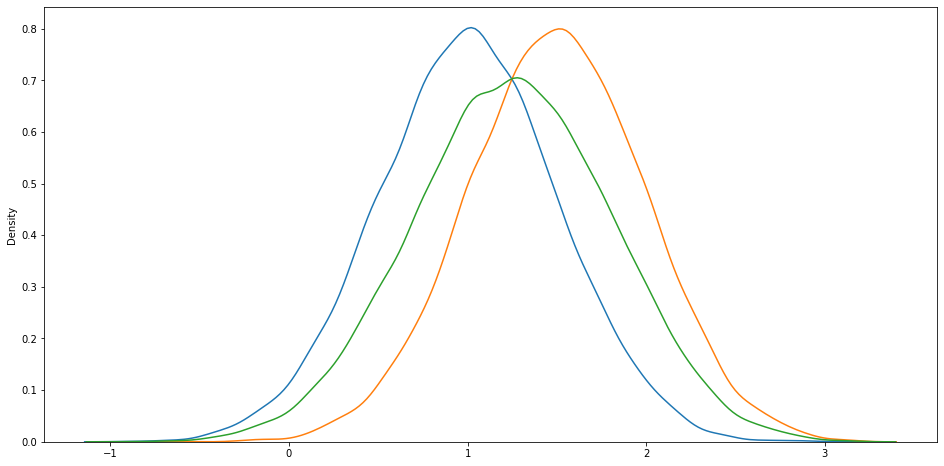

In [121]:
sns.kdeplot(u_values)
sns.kdeplot(v_values)
sns.kdeplot(all_values)

In [134]:
a = list(u_values)

In [135]:
b = list(v_values )

In [137]:
c = np.array(a + b)

In [138]:
c.size

20000

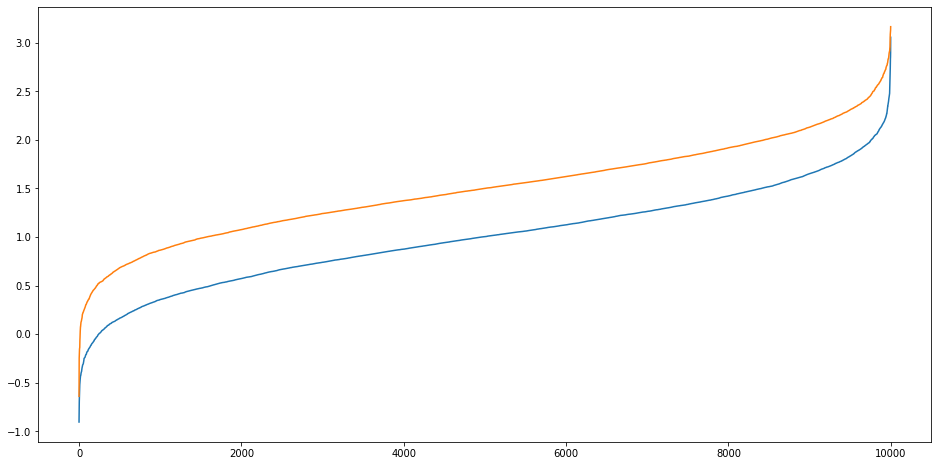

In [147]:
plt.plot(sorted(a))
plt.plot(sorted(b))

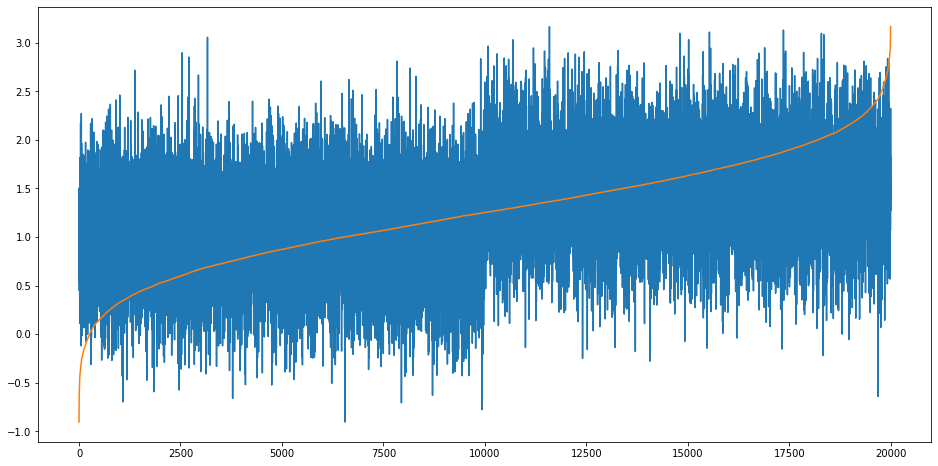

In [139]:
plt.plot(c)
plt.plot(all_values)

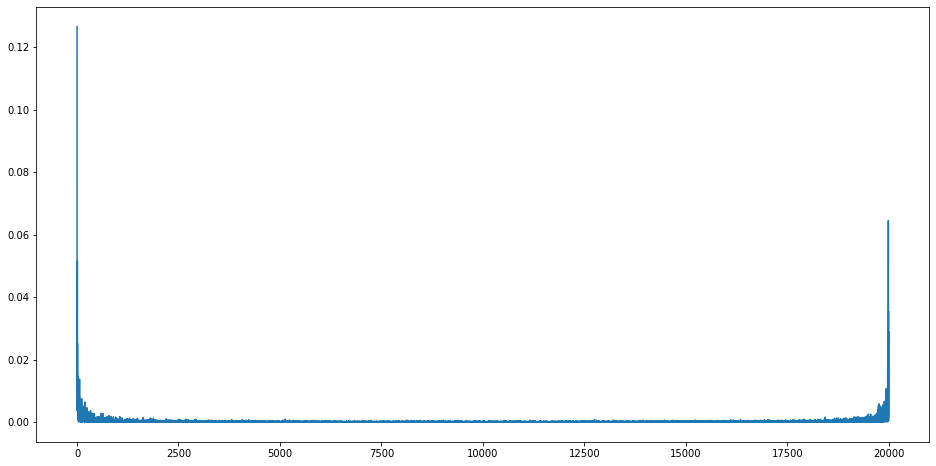

In [145]:
plt.plot(deltas)

In [86]:
u_values.size

10000

In [84]:
all_values.size

20000

In [82]:
deltas.size

19999

In [87]:
# Get the respective positions of the values of u and v among the values of
# both distributions.
u_cdf_indices = u_values[u_sorter].searchsorted(all_values[:-1], 'right')
v_cdf_indices = v_values[v_sorter].searchsorted(all_values[:-1], 'right')

- as posicoes, uma vez ordenados e colocados em um unico array, faz sentido, ver a posicao de cada ponto, de cada assinatura. Aqui jah vai uma intuicao se estao separados ou nao, a ordenacao perfeita, que teria muito esforco para juntar, seria sem overlap de posicoes de um no outro. 
- Se ha overlap total [a,b,a,b], o esforco vai ser minimo, porque levar um para o outro vai ser possivel com apenas um passo

In [88]:
u_cdf_indices

array([    1,     2,     3, ..., 10000, 10000, 10000])

In [89]:
v_cdf_indices

array([   0,    0,    0, ..., 9997, 9998, 9999])

In [90]:
print('posicoes')
print(u_cdf_indices)
print(v_cdf_indices)

posicoes
[    1     2     3 ... 10000 10000 10000]
[   0    0    0 ... 9997 9998 9999]


- os indices divididos pelo tamanho

In [96]:
# Calculate the CDFs of u and v using their weights, if specified.
if u_weights is None:
    u_cdf = u_cdf_indices / u_values.size
else:
    u_sorted_cumweights = np.concatenate(([0],
                                          np.cumsum(u_weights[u_sorter])))
    u_cdf = u_sorted_cumweights[u_cdf_indices] / u_sorted_cumweights[-1]    

In [97]:
u_cdf

array([1.e-04, 2.e-04, 3.e-04, ..., 1.e+00, 1.e+00, 1.e+00])

In [98]:
if v_weights is None:
    v_cdf = v_cdf_indices / v_values.size
else:
    v_sorted_cumweights = np.concatenate(([0],
                                          np.cumsum(v_weights[v_sorter])))
    v_cdf = v_sorted_cumweights[v_cdf_indices] / v_sorted_cumweights[-1]

In [99]:
v_cdf

array([0.    , 0.    , 0.    , ..., 0.9997, 0.9998, 0.9999])

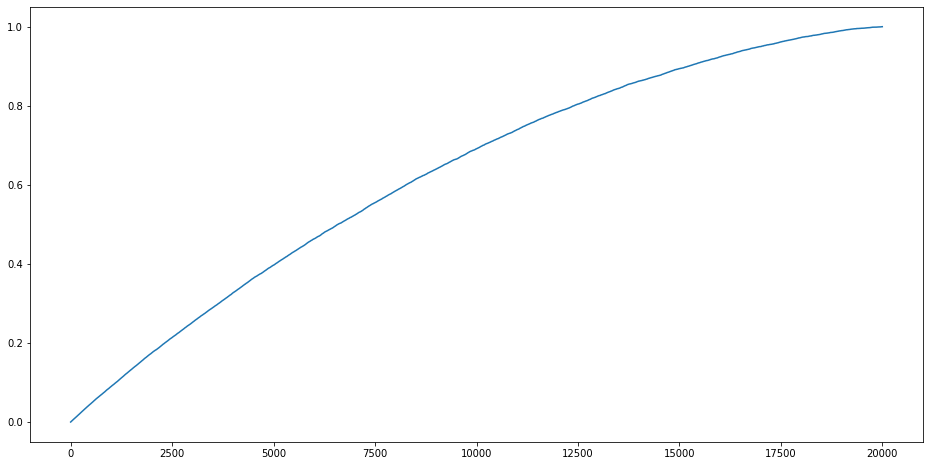

In [100]:
plt.plot(u_cdf)

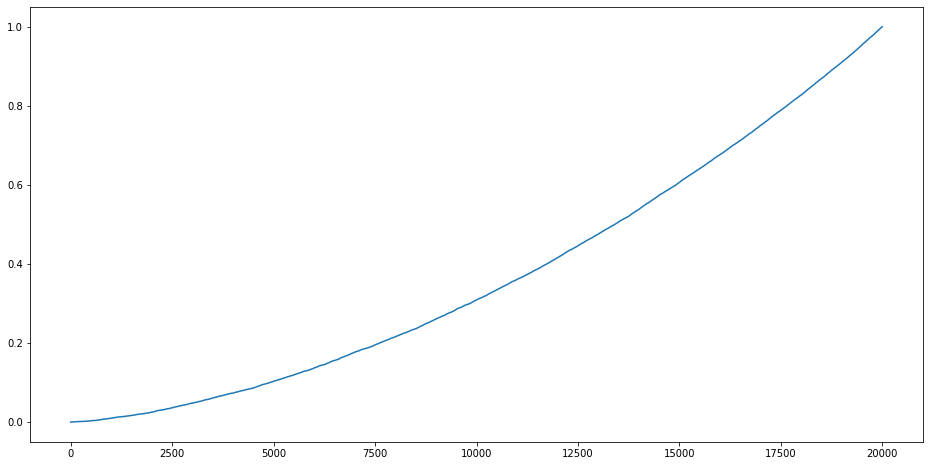

In [101]:
plt.plot(v_cdf)

In [103]:
# Compute the value of the integral based on the CDFs.
# If p = 1 or p = 2, we avoid using np.power, which introduces an overhead
# of about 15%.
if p == 1:
    result = np.sum(np.multiply(np.abs(u_cdf - v_cdf), deltas))
if p == 2:
    result =  np.sqrt(np.sum(np.multiply(np.square(u_cdf - v_cdf), deltas)))    

In [106]:
diff_abs = np.abs(u_cdf - v_cdf)

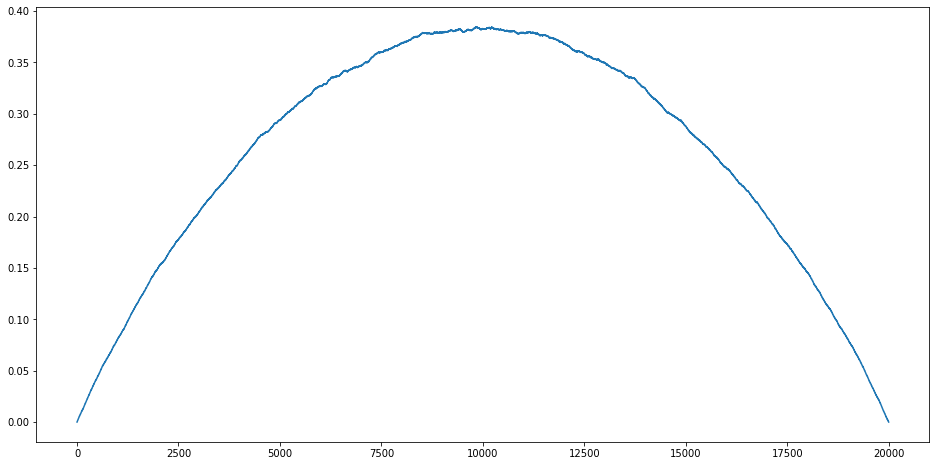

In [107]:
plt.plot(diff_abs)

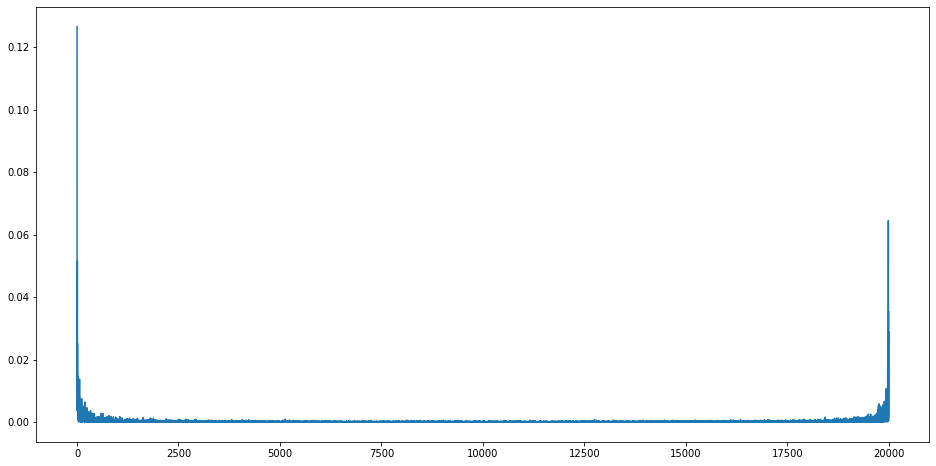

In [112]:
plt.plot(deltas)

## diff_abs: quantidades minimas diferenciais que precisam ser movidas (fluxo i j )
## deltas: distancias que vao ser movidas

In [111]:
multi = np.multiply(diff_abs, deltas)

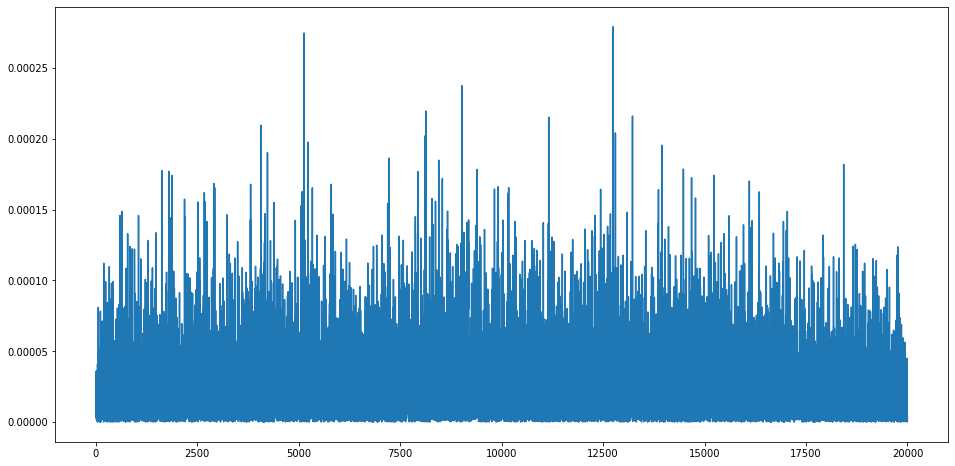

In [143]:
plt.plot(multi)

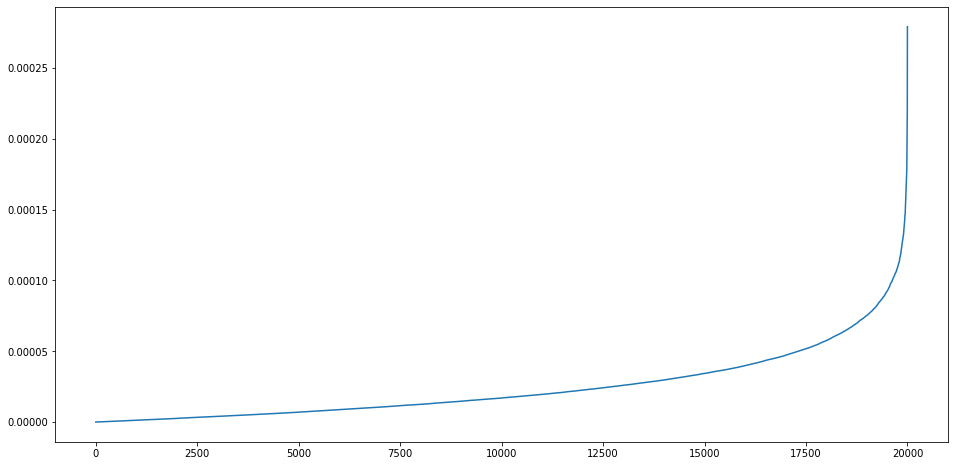

In [142]:
plt.plot(sorted(multi))

In [104]:
result

0.4965946125903984

In [70]:
return np.power(np.sum(np.multiply(np.power(np.abs(u_cdf - v_cdf), p),
                                   deltas)), 1/p)

In [71]:
_cdf_distance(p = 1, u_values = dists[0][0], v_values = dists[0][1])

argsort
[6554 9930 7944 ... 2706 2538 3165]
[9688 4066 2407 ... 5533 7357 1591]
mergesort
[-0.90392873 -0.7774293  -0.70614725 ...  3.10969016  3.12935534
  3.1646002 ]
diferenca entre todos valores
[0.12649943 0.07128205 0.01073164 ... 0.0133332  0.01966518 0.03524486]
posicoes
[    1     2     3 ... 10000 10000 10000]
[   0    0    0 ... 9997 9998 9999]


0.4965946125903984